# Decision Tree Classification
## Jade Gee
---
---

## Background

A decision tree is a flowchart-like structure where internal node represents a test on a feature set. Each leaf node represents a label for a class, and the branches represent conjunctions of features that lead to those labels. These paths represent classification rules. The below diagram represents a decision tree:

![Classification Trees](trees.png)

The algorithm uses recursive binary splitting to determine classifications, so in the initial pass, the algorithm considers all of the training data and divides the groups based on that data. From there it calculates how much the accuracy of each split and chooses the least cost. As stated previously, the algorithm is recursive in nature because the groups formed can be sub-divided using the same strategy. It is this feature that leads this algorithm to be known as the greedy algorithm--there is an excessive desire of lowering the cost which makes the root node the best classifier.

Like all machine learning algorithms, there are upsides and downsides to their usage. Some of the advantages and disadvantages of classification trees are as follows:

#### Advantages

+ Simple to understand, interpret, visualize

+ Implicitly perform variable screening or feature selection

+ Can handle both numerical and categorical data
    - Can also handle multi-output problems
    
+ Decision trees require relatively little effort from users for data preparation

+ Nonlinear relationships between parameters do not affect tree performance

#### Disadvantages

+ Can create over-complex trees that do not generalize the data well (over-fitting)

+ Can be unstable because variance in the data might result in a completely different tree being generated

+ Algorithms cannot guarantee to return the globally optimal decision tree.

+ Decision tree learners can create biased trees if certain classes dominate.
    - Recommended to balance the data set prior to fitting with the decision tree.
    
---
---

## Import Packages

To build the network we will need to import the following packages:

+ `sklearn.datasets`: to access the `Digits` data set

+ `sklearn.tree`: to access the functions `DecisionTreeClassifier`, `DecisionTreeRegressor`, and `plot_tree`
    - Builds the decision tree classification model
    - Models the regression

+ `sklearn.model_selection`: to access the `train_test_split` model
    - Allows us to split the data into a training and test data subsets.

+ `sklearn.metrics`: to access the `plot_confusion_matrix`, `accuracy_score`, and `classification_report`
    - To plot the confusion matrix
    - To get the accuracy score
    - To print the classification report
        
+ `tensorflow.keras.utils`: to access the function `plot_model`
    - Allows us to store the visualization of our Classification Trees model after `Keras` assigns the layer names in the image

+ `matplotlib.pyplot`: to show the images in the notebook
---

In [1]:
from sklearn.datasets import load_digits
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix, classification_report, accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline
%pprint

Pretty printing has been turned OFF


---
## Data Manipulation
### Gather the Data

For the purpose of this notebook, we will utilize the Digits dataset located in the `sklearn.datasets` package. The `digits` data set is a copy mof the test set of the UCI ML hand-written digits datasets which can be found [here](https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits). For additional information regarding the dataset, we will display the description of it below.

In [3]:
digits = load_digits()
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

<font size="3">**Now we with the data loaded for preparation, we will take a look at the data to see its layout.**</font>

In [4]:
# View the data
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [5]:
#Flatten the data
samples = len(digits.images)
data = digits.images.reshape((samples, -1))
data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

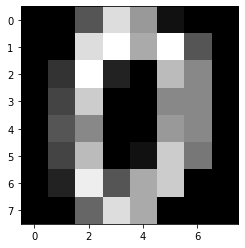

In [6]:
# Example of the data images
plt.gray()
plt.imshow(digits.images[0])
plt.show()

---
### Select the Feature Set & Split the Data

From our data set, `digitd`, we will extract our independent variable data, `features`, using the `digits.data` column; and also extract our dependent variable data, `labels`, using the `digits.target` column. Once this is completed, we must divide the data into a training set and a test set, all of which will be done in the following code cell.

In [7]:
# Separating the independent variable
features = digits.data

# Separating the dependent variable
labels = digits.target

# Split the Data
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size = 0.25, random_state = 1)

---
### Decision Tree Model Creation

With our data extracted and split in to testing and training set, we will now build our decision tree model. For our activation function, we will use the `entropy` option for the `criterion` argument. This will allow us to select the function that will measure the quality of a split. The entropy attempts to maximize the mutual information by building an equal probability node within the decision tree for the purpose of information gain.

In [8]:
digits_CLF = DecisionTreeClassifier(criterion= "entropy",max_depth=2, random_state=11)
digits_CLF_model = digits_CLF.fit(X_train, y_train)

y_predict = digits_CLF.predict(X_test)

---
### Model Evaluation

Since we've created our Decision Tree model, we can now estimate how accurately the prediction of the hand-written digits are. To do this, we will compare the actual test set values to the predicted values and compute an accuracy rate.

In [10]:
digits_accuracy = accuracy_score(y_test, y_predict)*100
print("-------------------------------------")
print("Inital Setup")
print("Accuracy Rate: ", digits_accuracy, "%")
print("-------------------------------------")

-------------------------------------
Inital Setup
Accuracy Rate:  37.333333333333336 %
-------------------------------------


As we can see, our model is at a 37.33% accuracy rating. As this is not a decent accuracy rate, we will fine tune the parameters in our algorithm to attempt to achieve better accuracy.

---
### Repeat parameterization of Decision Tree Algorithm

To try to get a better model, we will alter the maximum depth of the decision tree classifier model, and re-evaluate the model until we get a model with better accuracy. To do this we will increment the maximum depth using a nested loop to update the model.

In [11]:
# Re-parameterize the model
for i in range(3, 10):
    if digits_accuracy < 85.0:
        digits_CLF = DecisionTreeClassifier(max_depth=i, random_state=11)
        digits_CLF_model = digits_CLF.fit(X_train, y_train)
        y_predict = digits_CLF.predict(X_test)
        digits_accuracy = accuracy_score(y_test, y_predict)*100
        print("-------------------------------------")
        print("New Setup")
        print("At Max Depth: ", i)
        print("Accuracy Rate: ", digits_accuracy, "%")
        print("-------------------------------------")
    else:
        break
        print("-------------------------------------")
        print("New Setup")
        print("At Max Depth: ", i)
        print("Accuracy Rate: ", digits_accuracy, "%")
        print("-------------------------------------")

-------------------------------------
New Setup
At Max Depth:  3
Accuracy Rate:  46.22222222222222 %
-------------------------------------
-------------------------------------
New Setup
At Max Depth:  4
Accuracy Rate:  57.99999999999999 %
-------------------------------------
-------------------------------------
New Setup
At Max Depth:  5
Accuracy Rate:  66.66666666666666 %
-------------------------------------
-------------------------------------
New Setup
At Max Depth:  6
Accuracy Rate:  76.66666666666667 %
-------------------------------------
-------------------------------------
New Setup
At Max Depth:  7
Accuracy Rate:  82.22222222222221 %
-------------------------------------
-------------------------------------
New Setup
At Max Depth:  8
Accuracy Rate:  85.55555555555556 %
-------------------------------------


As we can see from above, at a `max_depth` of 8, our model has 85.55% accuracy. With a more accurate model to work with, we will proceed to re-test and visualize it.

---
### Re-test the Model

In [12]:
for i in range(0, 126, 25):
    print("---- Digits Image ", i, "----")
    print("Predicted Label: ", digits_CLF_model.predict(X_test[i].reshape(1, -1)), 
      "\nActual Label: ", y_test[i])
    print("---------------------------")

---- Digits Image  0 ----
Predicted Label:  [1] 
Actual Label:  1
---------------------------
---- Digits Image  25 ----
Predicted Label:  [9] 
Actual Label:  9
---------------------------
---- Digits Image  50 ----
Predicted Label:  [4] 
Actual Label:  4
---------------------------
---- Digits Image  75 ----
Predicted Label:  [4] 
Actual Label:  4
---------------------------
---- Digits Image  100 ----
Predicted Label:  [9] 
Actual Label:  3
---------------------------
---- Digits Image  125 ----
Predicted Label:  [6] 
Actual Label:  6
---------------------------


---
## Visualizing the data


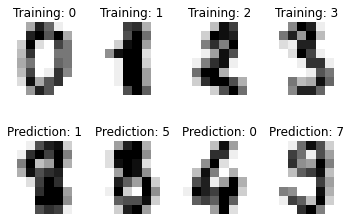

In [13]:
_, axes = plt.subplots(2, 4)
images_and_labels = list(zip(digits.images, digits.target))
for ax, (image, label) in zip(axes[0, :], images_and_labels[:4]):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Training: %i' % label)

images_and_predictions = list(zip(digits.images[samples // 2:], y_predict))
for ax, (image, prediction) in zip(axes[1, :], images_and_predictions[:4]):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Prediction: %i' % prediction)
    
plt.show()

We will also plot the data as a regression tree in the following code cell. For better visualization, we will also display the regression tree with a maximum depth of three.

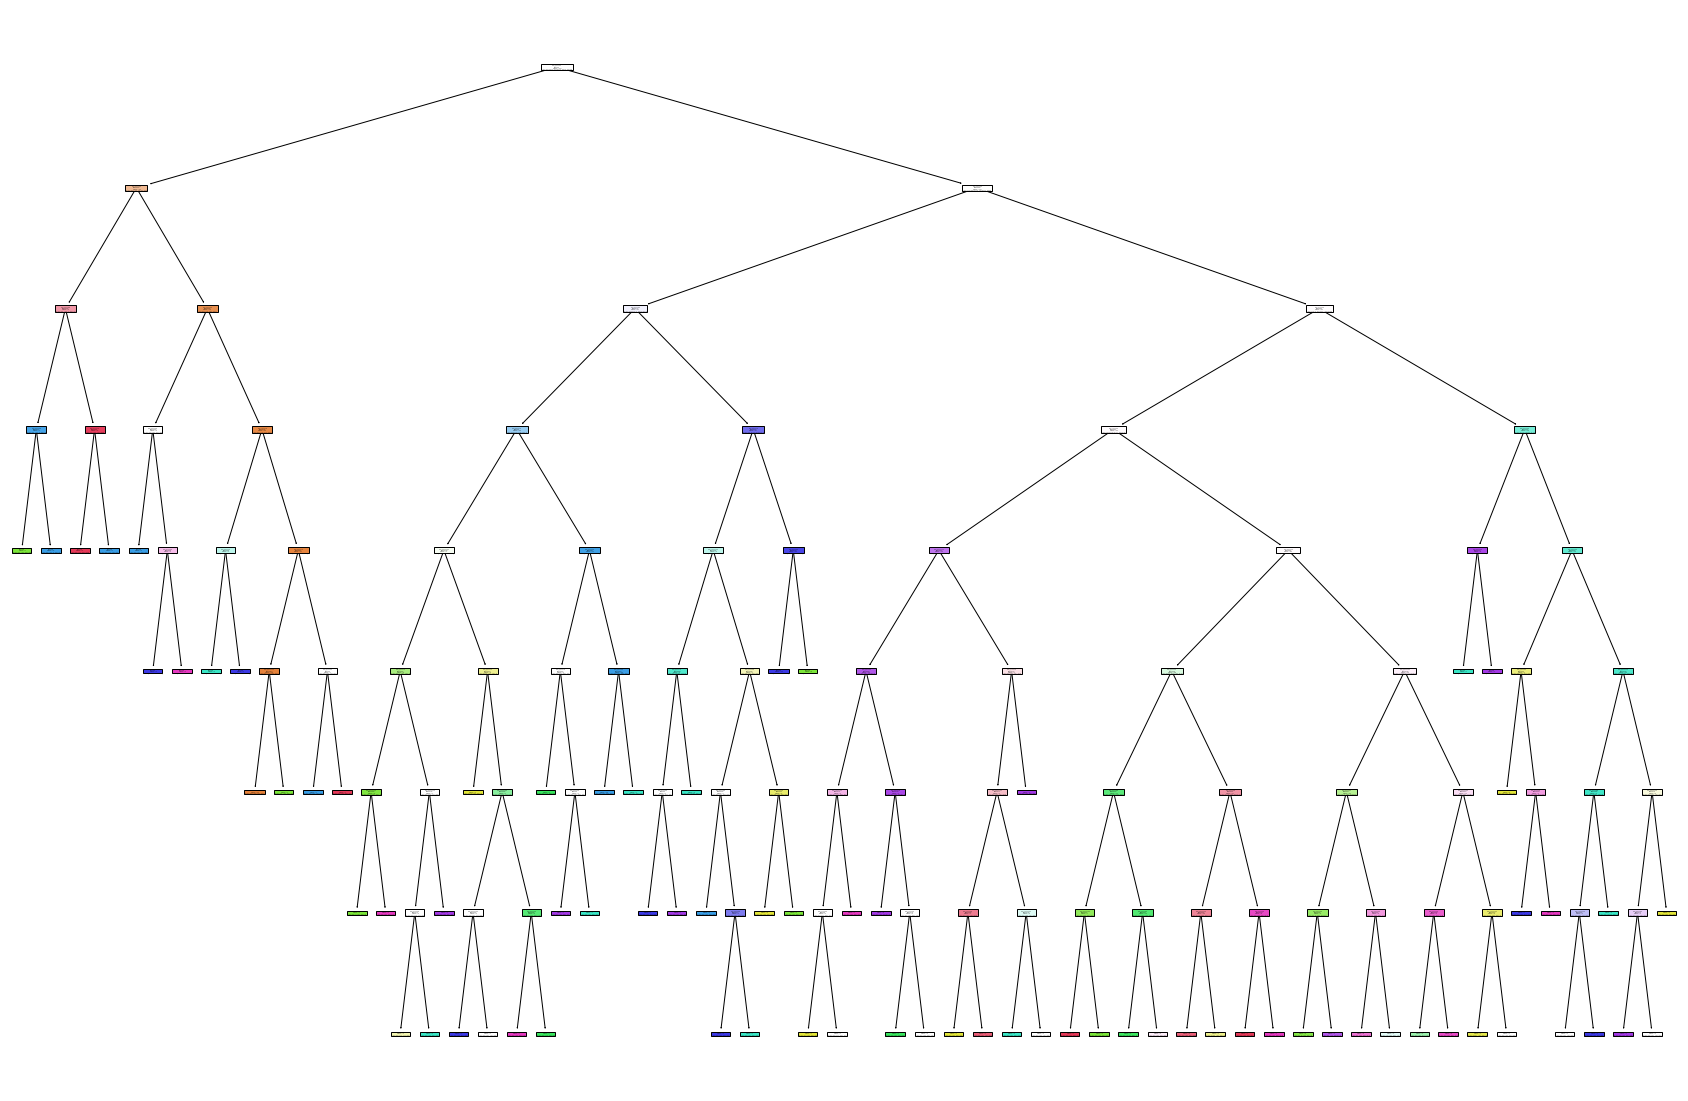

In [14]:
fig = plt.figure(figsize=(30,20))
_ = plot_tree(digits_CLF_model, feature_names=digits.feature_names, filled=True)

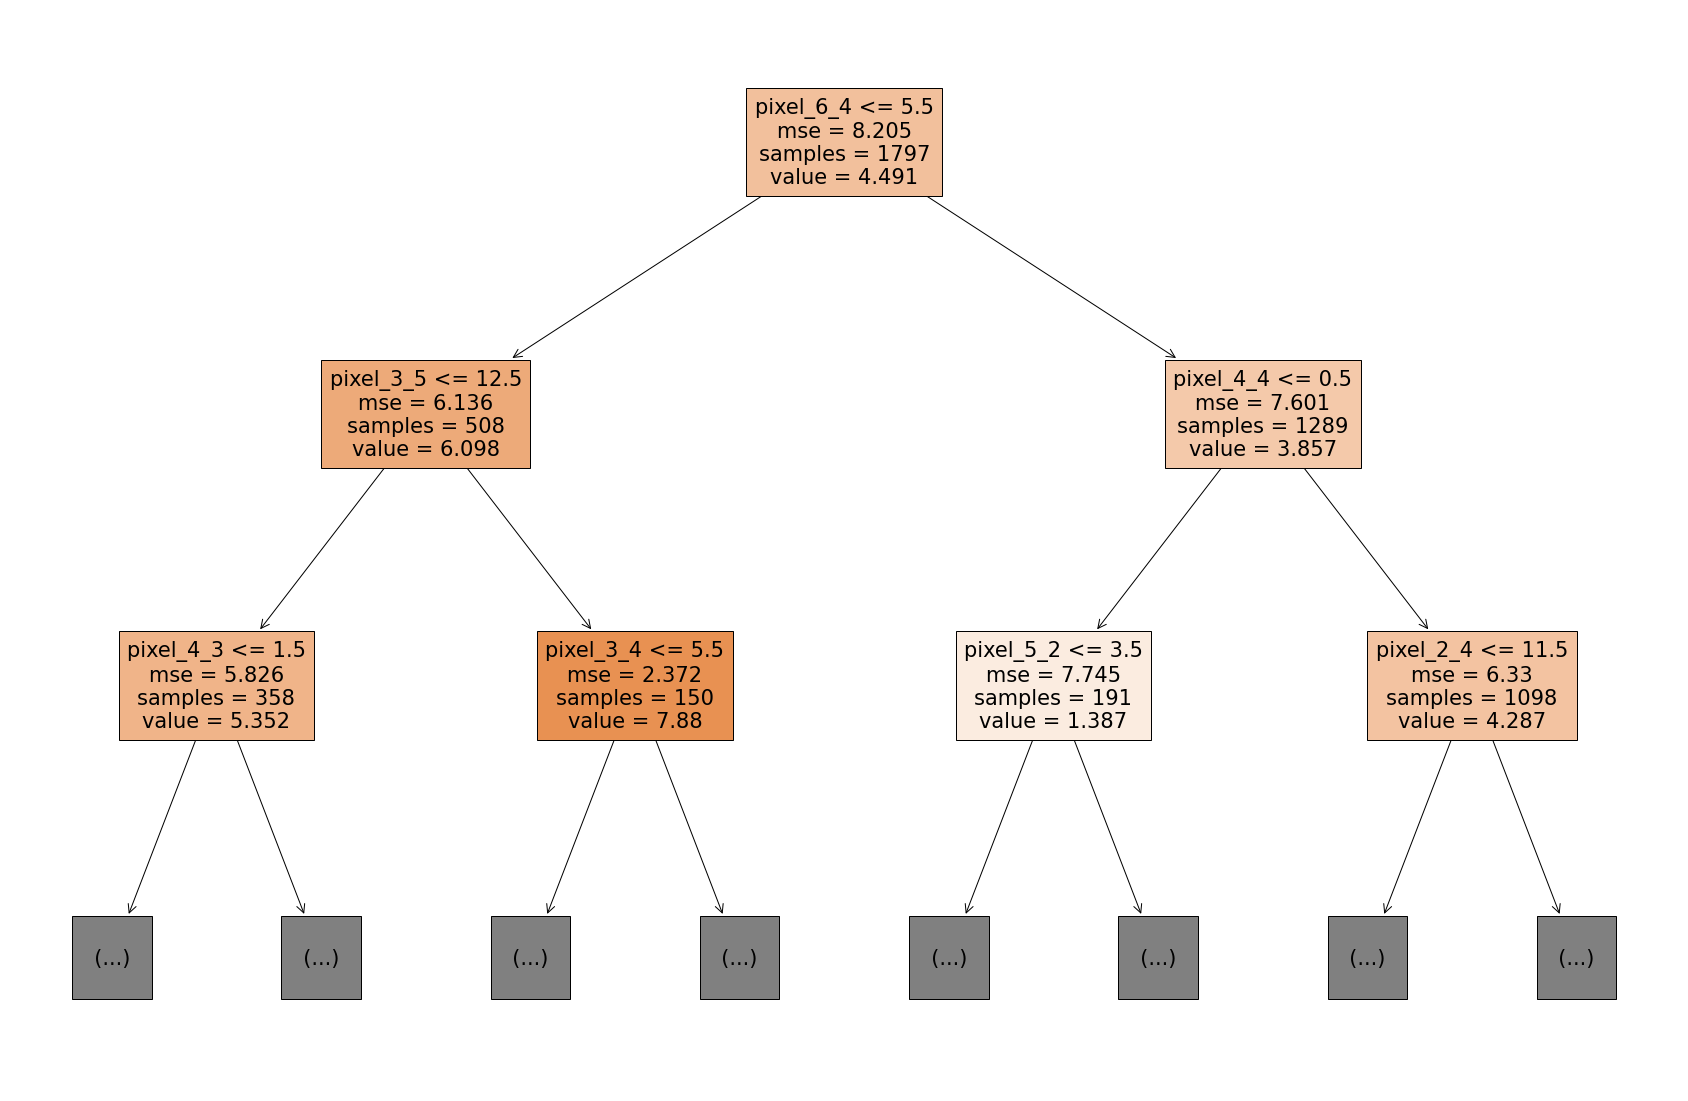

In [15]:
regression = DecisionTreeRegressor(max_depth= 8, random_state=11)
model = regression.fit(digits.data, digits.target)

fig = plt.figure(figsize=(30,20))
_ = plot_tree(regression, feature_names=digits.feature_names, filled=True, max_depth=2)

---
### Summarize the Model

Classification Report for digits_CLF DecisionTreeClassifier(max_depth=8, random_state=11):
              precision    recall  f1-score   support

           0       1.00      0.91      0.95        53
           1       0.81      0.83      0.82        42
           2       0.80      0.88      0.84        41
           3       0.94      0.65      0.77        52
           4       0.85      0.96      0.90        47
           5       0.90      0.90      0.90        39
           6       0.95      0.93      0.94        43
           7       0.87      0.83      0.85        48
           8       0.74      0.86      0.80        37
           9       0.73      0.83      0.78        48

    accuracy                           0.86       450
   macro avg       0.86      0.86      0.86       450
weighted avg       0.86      0.86      0.86       450




Text(0.5, 0.98, 'Confusion Matrix')

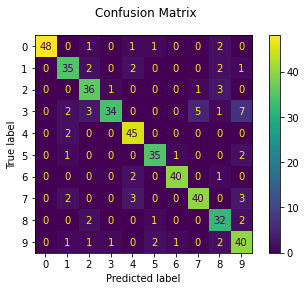

In [16]:
print("Classification Report for digits_CLF %s:\n%s\n"
      % (digits_CLF, classification_report(y_test, y_predict)))
confusionMatrix = plot_confusion_matrix(digits_CLF_model, X_test, y_test)
confusionMatrix.figure_.suptitle("Confusion Matrix")

---
## Conclusion

At a maximum depth of 8, we are able to get the accuracy of the classification tree algorithm over 85%. Therefore, we can safely say that our algorithm ran successfully.

### For more information on Decision Tree Modeling, please see:

+ [Decision Trees in Machine Learning](https://towardsdatascience.com/decision-trees-in-machine-learning-641b9c4e8052)

+ [Decision Tree in Machine Learning](https://towardsdatascience.com/decision-tree-in-machine-learning-e380942a4c96)

+ [Have You Heard About Unsupervised Decision Trees](https://www.datasciencecentral.com/profiles/blogs/have-you-heard-about-unsupervised-decision-trees)

---
---